# Objective is to find whether a person of some estimated salary and age will be purchasing a product from a social network ad or not

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


# Reading the data

In [42]:
df=pd.read_csv('Social_Network_Ads.csv')

In [43]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

# So our target is purchased(1 or 0)
# Our features are Age and Estimated Salary

In [44]:
target=df['Purchased']
features=df.drop('Purchased',axis=1).copy()

In [45]:
features=df.drop(['User ID','Gender','Purchased'],axis=1)

# Checking the distribution of both features and considering them as Gaussian

(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 10 Patch objects>)

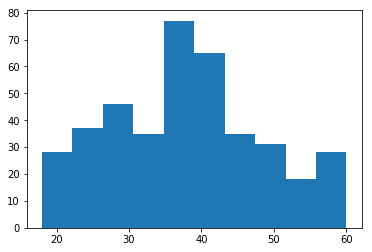

In [47]:
plt.hist(features['Age'])

(array([51., 39., 58., 50., 82., 40., 22., 19., 17., 22.]),
 array([ 15000.,  28500.,  42000.,  55500.,  69000.,  82500.,  96000.,
        109500., 123000., 136500., 150000.]),
 <a list of 10 Patch objects>)

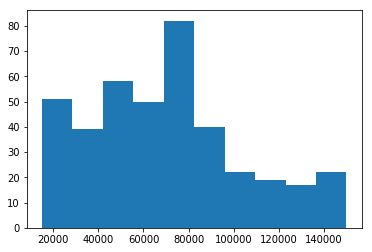

In [48]:
plt.hist(features['EstimatedSalary'])

# Plotting the features based on Purchase(0 or 1)

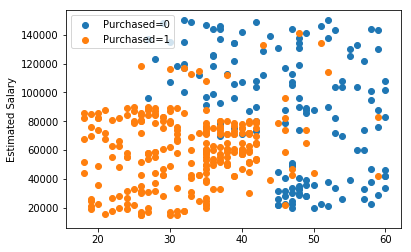

In [57]:
#Plotting a graph where blue color dots shows that purchases which were'nt made by different age groups of differrent salaries
#While yellow colour implies purchases that have been made by different ages of different salaries

plt.scatter(df[df['Purchased']==1]['Age'],df[df['Purchased']==1]['EstimatedSalary'],label="Purchased=0")
plt.scatter(df[df['Purchased']==0]['Age'],df[df['Purchased']==0]['EstimatedSalary'],label="Purchased=1")
plt.legend()
plt.ylabel("Estimated Salary")
plt.show()

#On X axis we have Age
#Due to some errors, unable to show xlabel

# Checking shapes

In [46]:
print('shape of target:',target.shape)
print('shape of features:',features.shape)


shape of target: (400,)
shape of features: (400, 2)


# Making mean vectors which has means of positive and negative values in features

In [116]:
#At axis=0, we get mean of each row 
mean_pos=np.mean(features[df['Purchased']==1],axis=0)

mean_neg=np.mean(features[df['Purchased']==0],axis=0)



# Finding co-variance of positive and negative values in features

In [115]:
cov_pos=features[df['Purchased']==1].cov()

cov_neg=features[df['Purchased']==0].cov()

# Finding probability of all positive and negative values

In [119]:
p_pos=len(df[df['Purchased']==1])/len(df)
p_neg=len(df[df['Purchased']==0])/len(df)

# Defining Functions

Since we're considering Multivariate Gaussian Distribution formula for Prior Function,


   # $$ p(x | T)=\frac{1}{ \sqrt{(2\pi)^k (det(\varepsilon))}}e^{(-1(\frac{1}{2})(x-\mu)^T.(\varepsilon)^{-1}.(x-\mu))} $$  
   
## Here,
                                             
  ##### x ---> features
 #####  T ---> target variable
 ##### 𝜇 ---> mean of the features
 ##### 𝜀 ---> Co-variance of features                                    
                                             


In [120]:
def prior(x,mean,cov):
    return (1/(((2*np.pi)**len(x.T))*np.linalg.det(cov)))*np.exp(-0.5*np.dot(np.dot((x-mean).T,np.linalg.inv(cov)),x-mean))

Formula for posterior function positive is,

### $$p(T|x=1)=\frac{p(x=1|T)p(x=1)}{p(x=1|T)p(x=1)+p(x=0|T)p(x=0)}$$

Formula for posterior function positive is,

### $$p(T|x=0)=\frac{p(x=0|T)p(x=1)}{p(x=1|T)p(x=1)+p(x=0|T)p(x=0)}$$

In [95]:
def post_pos(x,mean_pos,mean_neg,cov_pos,cov_neg):
    return prior(x,mean_pos,cov_pos)*p_pos/((prior(x,mean_pos,cov_pos)*p_pos)+(prior(x,mean_neg,cov_neg)*p_neg))
def post_neg(x,mean_pos,mean_neg,cov_pos,cov_neg):
    return prior(x,mean_neg,cov_neg)*p_neg/((prior(x,mean_pos,cov_pos)*p_pos)+(prior(x,mean_neg,cov_neg)*p_neg))



## Now for dot product to happen between covariance and features, we need to consider each instance of features instead of using the whole matrix to satisfy the dot product

In [110]:
np.dot((features.iloc[50]-mean_pos).T,np.linalg.inv(cov_pos))

array([-4.13493295e-01, -6.19140819e-05])

## Here we can see that shape of features of a particular instance and shape of covariance are same which means dot product can be done

In [111]:
(features.iloc[50]-mean_pos).T.shape

(2,)

In [100]:
np.linalg.inv(cov_pos).shape

(2, 2)

# Hence here we find a posterior probability if purchased or not whether depending upon each feature instances 

In [102]:
pred_class=[]
for i in range(len(df)):
    q=post_pos(features.iloc[i],mean_pos,mean_neg,cov_pos,cov_neg)
    r=post_neg(features.iloc[i],mean_pos,mean_neg,cov_pos,cov_neg)
    if(q>r):
        pred_class.append(1)
    else:
        pred_class.append(0)

# Finally checking our results how accurate they're when compared to original ones

In [117]:
def accuracy(predicted,actual):
  correct = 0
  for i in range(0,len(predicted)):
    if(predicted[i]==actual.iloc[i]):
      correct += 1
  return (correct/len(actual))*100

In [118]:
accuracy(pred_class,target)

88.0